# Simple regression with TensorFlow

Progressive example working through various network set ups

https://towardsdatascience.com/training-neural-networks-for-price-prediction-with-tensorflow-8aafe0c55198

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.13.1


In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [47]:
dat = pd.read_csv("./rbfs/phi_reduce.csv")
dat.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,854,855,856,857,858,859,860,y,site,date
0,0,1.000000,0.997378,0.989553,0.976648,0.958862,0.936470,0.909811,0.879282,0.845327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014,2005,2023-01-01
1,1,1.000000,0.997433,0.989662,0.976809,0.959074,0.936729,0.910113,0.879622,0.845701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007,2005,2023-01-01
2,2,0.999999,0.997487,0.989771,0.976971,0.959285,0.936987,0.910414,0.879962,0.846074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002,2005,2023-01-01
3,3,0.999997,0.997541,0.989879,0.977131,0.959496,0.937245,0.910715,0.880302,0.846447,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,2005,2023-01-01
4,4,0.999995,0.997594,0.989986,0.977291,0.959707,0.937502,0.911016,0.880641,0.846820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.011,2005,2023-01-01


In [48]:
X = dat.iloc[:, 1:862].to_numpy()
y = dat['y'].to_numpy()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8, random_state=42)

## TensorFlow

In [50]:
# Set random seed
tf.random.set_seed(42)
from keras import Sequential
from keras import models
from keras import layers

In [51]:
n_feat = X_train.shape[1]

### Model 1 (Simple TF regression)

In [52]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dense(512, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Initial_model")
model.summary()

Model: "Initial_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               441344    
                                                                 
 dense_19 (Dense)            (None, 512)               262656    
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 1)                 129       
                                                                 
Total params: 934145 (3.56 MB)
Trainable params: 9341

In [53]:
# Compile the model
initial_learning_rate = 0.00001
optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [54]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
33/33 [==============================] - 1s 20ms/step - loss: 0.0532 - mae: 0.0532 - mse: 0.0211 - val_loss: 0.0106 - val_mae: 0.0106 - val_mse: 1.8588e-04
Epoch 2/50
33/33 [==============================] - 1s 17ms/step - loss: 0.0105 - mae: 0.0105 - mse: 1.7612e-04 - val_loss: 0.0101 - val_mae: 0.0101 - val_mse: 1.6974e-04
Epoch 3/50
33/33 [==============================] - 1s 17ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6780e-04 - val_loss: 0.0099 - val_mae: 0.0099 - val_mse: 1.5514e-04
Epoch 4/50
33/33 [==============================] - 1s 18ms/step - loss: 0.0100 - mae: 0.0100 - mse: 1.6195e-04 - val_loss: 0.0098 - val_mae: 0.0098 - val_mse: 1.5909e-04
Epoch 5/50
33/33 [==============================] - 1s 17ms/step - loss: 0.0100 - mae: 0.0100 - mse: 1.6201e-04 - val_loss: 0.0097 - val_mae: 0.0097 - val_mse: 1.5481e-04
Epoch 6/50
33/33 [==============================] - 1s 18ms/step - loss: 0.0099 - mae: 0.0099 - mse: 1.6100e-04 - val_loss: 0.0098 - val_mae: 0.0098 

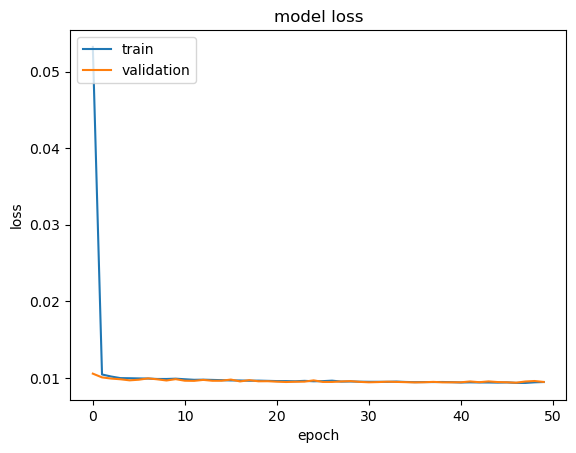

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [56]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

324/324 [==============================] - 1s 1ms/step


0.0096018651370137

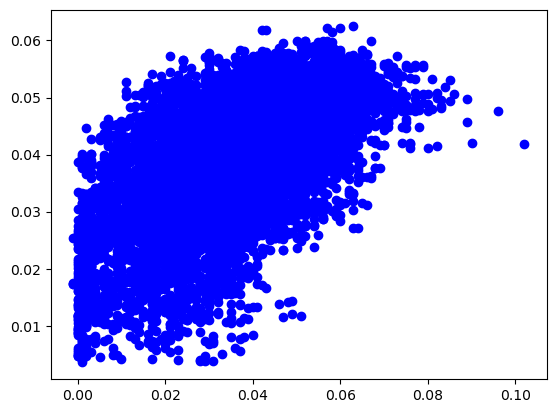

In [57]:
plt.plot(y_test, y_test_pred, 'bo')

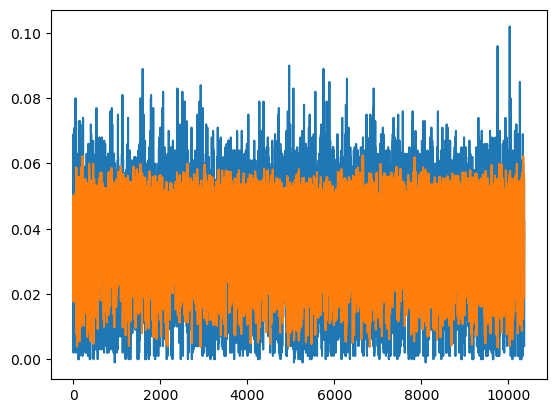

In [58]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

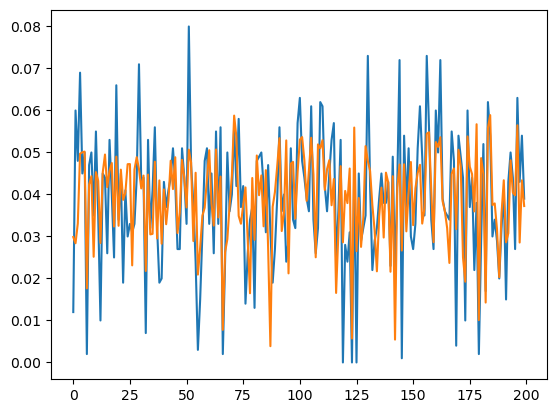

In [59]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()

### Regularization with drop-outs

In [60]:
model = models.Sequential([
  layers.Dense(512, activation='relu', input_shape=(n_feat,)),
  layers.Dropout(0.2),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='linear')
], name="Dropout")
model.summary()

Model: "Dropout"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               441344    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_26 (Dense)            (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 256)               6579

In [61]:
# Compile the model
model.compile(loss='mae', metrics=['mae', 'mse'], optimizer='adam')

In [62]:
history=model.fit(X_train, y_train, epochs=50, 
                  batch_size=1024, verbose=1, 
                  validation_split=0.2)

Epoch 1/50
33/33 [==============================] - 1s 26ms/step - loss: 0.0266 - mae: 0.0266 - mse: 0.0021 - val_loss: 0.0141 - val_mae: 0.0141 - val_mse: 2.8437e-04
Epoch 2/50
33/33 [==============================] - 1s 25ms/step - loss: 0.0113 - mae: 0.0113 - mse: 2.0186e-04 - val_loss: 0.0112 - val_mae: 0.0112 - val_mse: 1.9393e-04
Epoch 3/50
33/33 [==============================] - 1s 24ms/step - loss: 0.0106 - mae: 0.0106 - mse: 1.8131e-04 - val_loss: 0.0109 - val_mae: 0.0109 - val_mse: 1.8130e-04
Epoch 4/50
33/33 [==============================] - 1s 26ms/step - loss: 0.0104 - mae: 0.0104 - mse: 1.7544e-04 - val_loss: 0.0106 - val_mae: 0.0106 - val_mse: 1.7216e-04
Epoch 5/50
33/33 [==============================] - 1s 25ms/step - loss: 0.0103 - mae: 0.0103 - mse: 1.7179e-04 - val_loss: 0.0103 - val_mae: 0.0103 - val_mse: 1.7020e-04
Epoch 6/50
33/33 [==============================] - 1s 23ms/step - loss: 0.0102 - mae: 0.0102 - mse: 1.6799e-04 - val_loss: 0.0102 - val_mae: 0.0102 

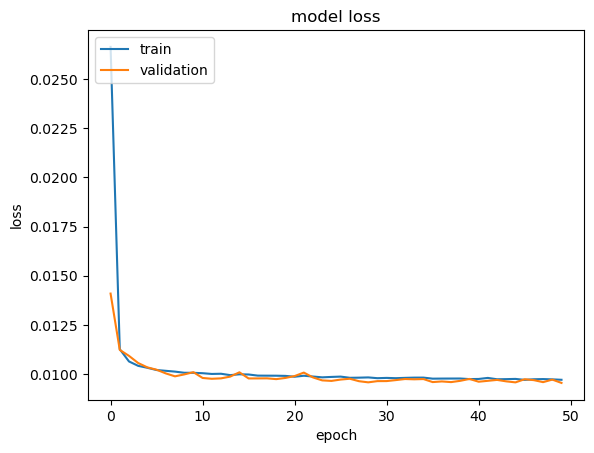

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
y_test_pred = model.predict(X_test)
mean_absolute_error(y_test, y_test_pred)

324/324 [==============================] - 0s 1ms/step


0.009678301644484116

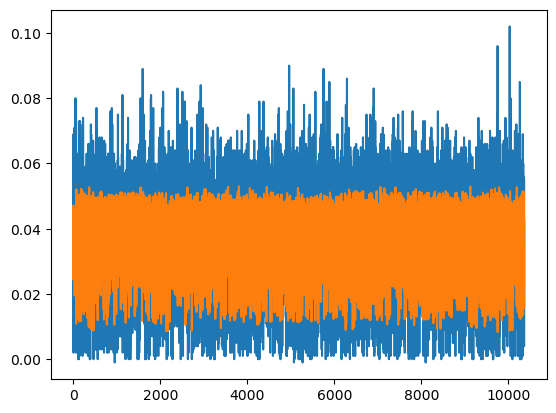

In [65]:
plt.plot(y_test)
plt.plot(y_test_pred)
plt.show()

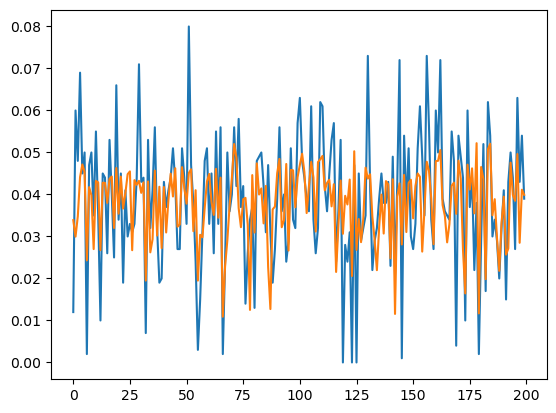

In [66]:
plt.plot(y_test[0:200])
plt.plot(y_test_pred[0:200])
plt.show()